In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
df_num = pd.read_csv('./df_num.csv')

In [75]:
df_num.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'In_Out', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_

In [76]:
df=df_num[['BeneID','InscClaimAmtReimbursed','IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualDeductibleAmt','PotentialFraud']]

In [77]:
#add new features:
df['IP_OP_TotalReimbursementAmt']=df['IPAnnualReimbursementAmt']+df['OPAnnualReimbursementAmt']
df['IP_OP_AnnualDeductibleAmt']=df['IPAnnualDeductibleAmt']+df['OPAnnualDeductibleAmt']

In [78]:
df.head()

,BeneID,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,BENE11001,26000,36000,60,3204,70,Yes,36060,3274
1,BENE11001,5000,36000,60,3204,70,No,36060,3274
2,BENE11001,5000,36000,60,3204,70,No,36060,3274
3,BENE11011,5000,5000,250,1068,320,No,5250,1388
4,BENE11014,10000,21260,120,2136,100,No,21380,2236


<AxesSubplot:xlabel='IP_OP_TotalReimbursementAmt', ylabel='InscClaimAmtReimbursed'>

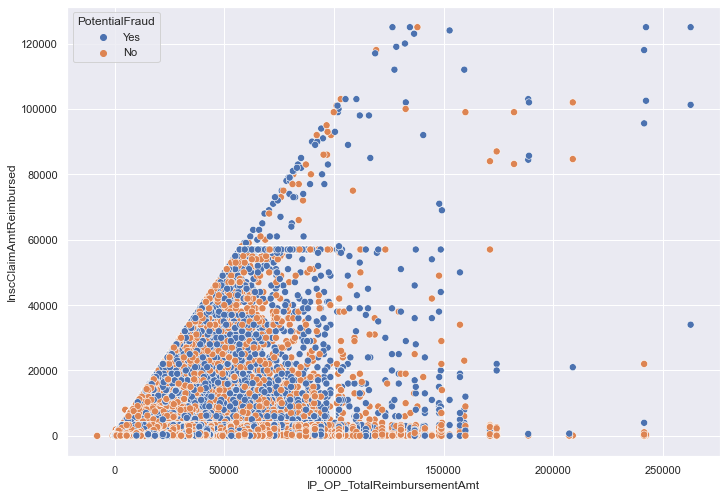

In [79]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df,x="IP_OP_TotalReimbursementAmt", y="InscClaimAmtReimbursed",
                hue='PotentialFraud',s=50)

<AxesSubplot:xlabel='IP_OP_AnnualDeductibleAmt', ylabel='InscClaimAmtReimbursed'>

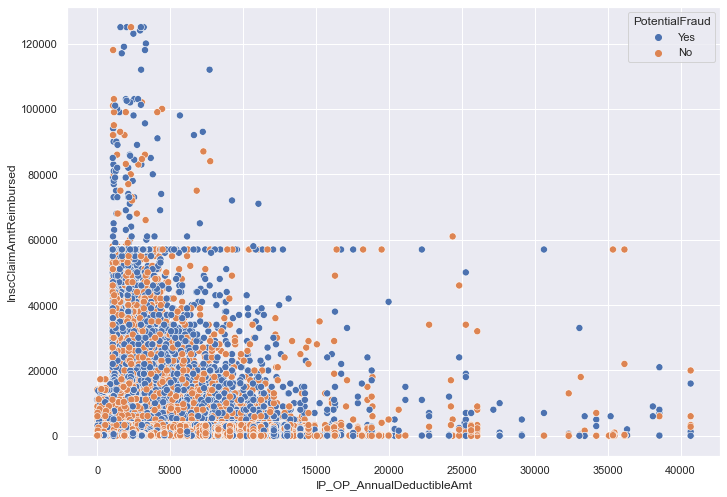

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df,x='IP_OP_AnnualDeductibleAmt', y="InscClaimAmtReimbursed",
                hue='PotentialFraud',s=50)

In [32]:
df.columns

Index(['BeneID', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualDeductibleAmt', 'PotentialFraud',
       'IP_OP_TotalReimbursementAmt', 'IP_OP_AnnualDeductibleAmt'],
      dtype='object')

In [81]:
df['Reim_group']=df['InscClaimAmtReimbursed']//10000

In [82]:
df['total_Reim_group']=df['IP_OP_TotalReimbursementAmt']//10000

In [83]:
df

,BeneID,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,Reim_group,total_Reim_group
0,BENE11001,26000,36000,60,3204,70,Yes,36060,3274,2,3
1,BENE11001,5000,36000,60,3204,70,No,36060,3274,0,3
2,BENE11001,5000,36000,60,3204,70,No,36060,3274,0,3
3,BENE11011,5000,5000,250,1068,320,No,5250,1388,0,0
4,BENE11014,10000,21260,120,2136,100,No,21380,2236,1,2
...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,800,0,5470,0,1870,No,5470,1870,0,0
558207,BENE159198,400,0,5470,0,1870,No,5470,1870,0,0
558208,BENE159198,60,0,5470,0,1870,No,5470,1870,0,0
558209,BENE159198,70,0,5470,0,1870,No,5470,1870,0,0


[Text(0.5, 0, 'total_Reim_group(10k$)'), Text(0, 0.5, 'Reim_group(10k$)')]

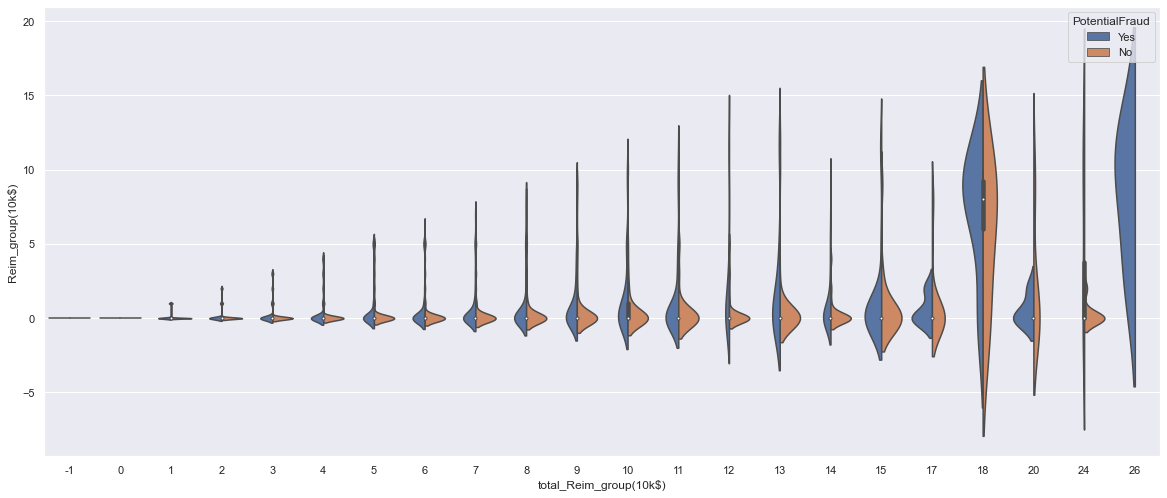

In [124]:
ax=sns.violinplot(y='Reim_group', x='total_Reim_group', hue='PotentialFraud', 
                   split=True, data=df);
ax.set(xlabel='total_Reim_group(10k$)', ylabel='Reim_group(10k$)')

NameError: name 'plt' is not defined

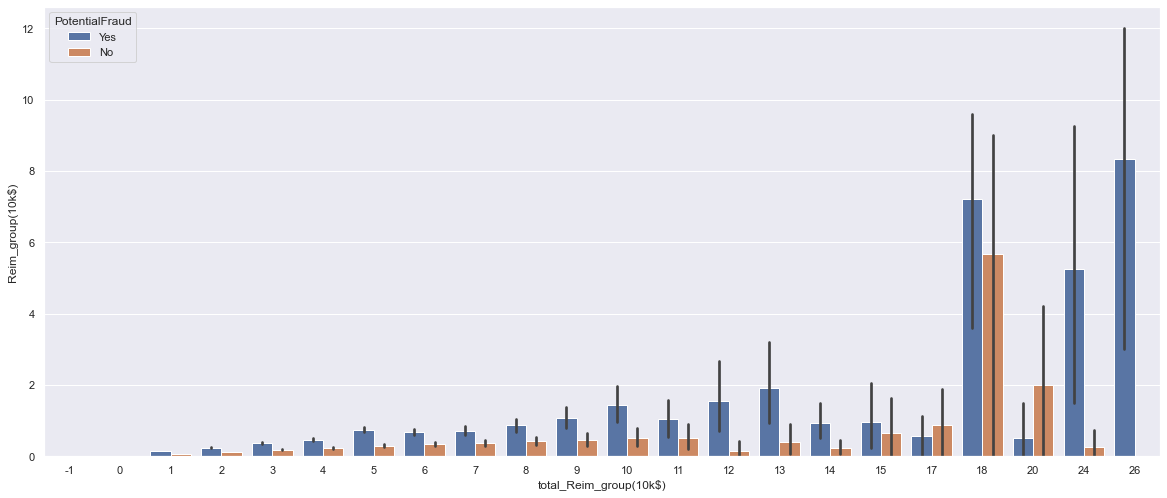

In [125]:
ax=sns.barplot(x='total_Reim_group', y="Reim_group", hue='PotentialFraud', data=df)
ax.set(xlabel='total_Reim_group(10k$)', ylabel='Reim_group(10k$)')
plt.savefig('./pics/TotalReimGroup_ReimGroup_bar')